<h1> Librerias Necesarias </h1>

In [3]:
import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt 

import os

<h1> Base de datos BOT-IOT </h1>

Se toma el 5% de la base de datos con todas la características. Este conjunto de datos tiene un archivo CSV que contiene registros normales y de ataque.

|Nombre del archivo |Tamaño del archivo|Número de registros|Número de características|
|:----|:----|:----|:----|
|UNSW_2018_IoT_Botnet_Full5pc_1.csv|259.7 MB|1'000.000|46|
|UNSW_2018_IoT_Botnet_Full5pc_2.csv|260.4 MB|1'000.000|46|
|UNSW_2018_IoT_Botnet_Full5pc_3.csv|269.1 MB|1'000.000|46|
|UNSW_2018_IoT_Botnet_Full5pc_4.csv|180.8 MB|668.552|46|

Este conjunto de datos tiene 46 características en 3 tipos de datos:

* Categóricas: flgs, proto, state, category, subcategory
* Binaria: attack
* Numéricas: El resto de las características

<h3> 1. Lectura de los datos </h3>

In [38]:
#Lectura de los archivos csv de la base de datos BOT-IOT
files_joined = os.path.join('.\BOT-IOT', "*.csv")
list_files = glob.glob(files_joined)
df = pd.concat(map(pd.read_csv, list_files), ignore_index=True)

C:\Users\kapla\AppData\Local\Temp\ipykernel_2396\4011324871.py:4: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(pd.read_csv, list_files), ignore_index=True)
C:\Users\kapla\AppData\Local\Temp\ipykernel_2396\4011324871.py:4: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(pd.read_csv, list_files), ignore_index=True)
C:\Users\kapla\AppData\Local\Temp\ipykernel_2396\4011324871.py:4: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(pd.read_csv, list_files), ignore_index=True)
C:\Users\kapla\AppData\Local\Temp\ipykernel_2396\4011324871.py:4: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(map(pd.read_csv, list_files), ignore_index=True)


In [39]:
print('Tamaño del conjunto de datos = ', df.shape)

Tamaño del conjunto de datos =  (3668522, 46)


<h3> 2. Limpieza de la base de datos </h3>

1. En el protocolo ICMP no esta definido el puerto, por tanto se asigna el valor de -1 en las carateríticas 'sport' y 'dport'
2. El protocolo ARP no contribuye en la realización de ataques, por tanto todas etiqutas asociadas a este protocolo se colocan como tráfico normal
3. Se convierte carateríticas 'sport' y 'dport' a volores enteros

In [40]:
#Limpieza de datos
df.loc[df.proto == 'icmp','sport'] = '-1'
df.loc[df.proto == 'icmp','dport'] = '-1'
df.loc[df.proto == 'arp','attack'] = 0
df.loc[df.proto == 'arp','category'] = 'Normal'
df.loc[df.proto == 'arp','subcategory'] = 'Normal'
df[['sport']]=df[['sport']].astype('int64')
df[['dport']]=df[['dport']].astype('int64')

In [41]:
df.head()

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1,1.528089e+09,e,1,tcp,1,192.168.100.147,49960,192.168.100.7,80,...,1.12704,96,75,1.133720,1.129970,770,602,1,DoS,HTTP
1,2,1.528089e+09,e,1,arp,2,192.168.100.7,-1,192.168.100.147,-1,...,15267.20000,1,2,0.005142,0.005142,2,6,0,Normal,Normal
2,3,1.528089e+09,e,1,tcp,1,192.168.100.147,49962,192.168.100.7,80,...,1.12704,96,75,1.135100,1.129970,770,602,1,DoS,HTTP
3,4,1.528089e+09,e,1,tcp,1,192.168.100.147,49964,192.168.100.7,80,...,1.12704,96,75,1.135140,1.129970,770,602,1,DoS,HTTP
4,5,1.528089e+09,e,1,tcp,1,192.168.100.147,49966,192.168.100.7,80,...,1.12704,96,75,1.135260,1.129970,770,602,1,DoS,HTTP


<h3> 2. Características </h3>

In [42]:
print('--- Tipo de dato de las características de la base de datos ----')
print(df.info())

--- Tipo de dato de las características de la base de datos ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668522 entries, 0 to 3668521
Data columns (total 46 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   pkSeqID                           int64  
 1   stime                             float64
 2   flgs                              object 
 3   flgs_number                       int64  
 4   proto                             object 
 5   proto_number                      int64  
 6   saddr                             object 
 7   sport                             int64  
 8   daddr                             object 
 9   dport                             int64  
 10  pkts                              int64  
 11  bytes                             int64  
 12  state                             object 
 13  state_number                      int64  
 14  ltime                             float64
 15  seq               

In [43]:
df.dtypes.value_counts()

int64      24
float64    15
object      7
dtype: int64

* Etiqueta 'attack'

0 -> Tráfico Normal

1 -> Tráfico de ataque

In [45]:
df.attack.value_counts()

1    3667879
0        643
Name: attack, dtype: int64

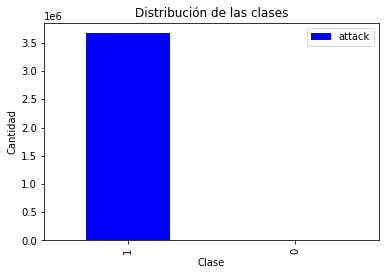

In [46]:
plt.figure()
plt.title("Distribución de las clases")
df['attack'].value_counts().plot(kind="bar", color='b')
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.legend()
plt.show()

* Etiqueta 'category'

In [47]:
df.category.value_counts()

DDoS              1926589
DoS               1650211
Reconnaissance      91004
Normal                643
Theft                  75
Name: category, dtype: int64

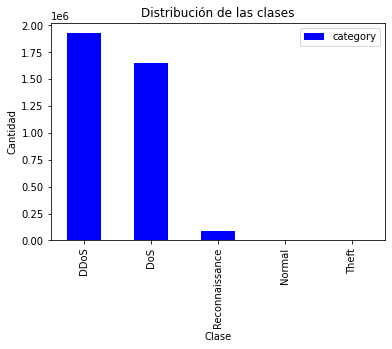

In [48]:
# Plotting target label distribution
plt.figure()
plt.title("Distribución de las clases")
df['category'].value_counts().plot(kind="bar", color='b')
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.legend()
plt.show()

* Etiqueta 'subcategory'

In [49]:
df.subcategory.value_counts()

UDP                  1981190
TCP                  1593143
Service_Scan           73122
OS_Fingerprint         17882
HTTP                    2467
Normal                   643
Keylogging                70
Data_Exfiltration          5
Name: subcategory, dtype: int64

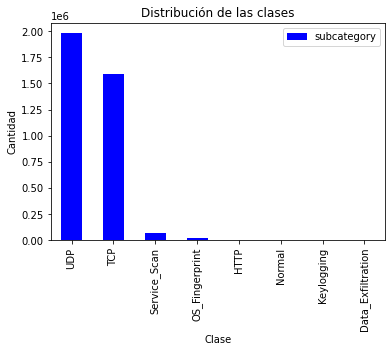

In [50]:
# Plotting target label distribution
plt.figure()
plt.title("Distribución de las clases")
df['subcategory'].value_counts().plot(kind="bar", color='b')
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.legend()
plt.show()

* Características categóricas

In [51]:
df.flgs.value_counts()

e        2293445
e s      1245171
e g        94344
eU         34599
e *          816
e d          137
e &            5
e   t          4
e  D           1
Name: flgs, dtype: int64

In [52]:
df.proto.value_counts()

udp          1996437
tcp          1662812
icmp            9052
arp              213
ipv6-icmp          8
Name: proto, dtype: int64

In [53]:
df.state.value_counts()

INT    1996208
REQ     878697
RST     775168
URP       8950
FIN       6387
ACC       2476
CON        526
ECO         70
TST         16
MAS         16
NRS          8
Name: state, dtype: int64

* Caracteríticas numéricas 

In [54]:
df.state_number.value_counts()

4     1996208
3      878697
1      775168
5        8950
6        6387
7        2476
2         526
9          70
10         16
11         16
8           8
Name: state_number, dtype: int64

In [55]:
df.proto_number.value_counts()

3    1996437
1    1662812
4       9052
2        213
5          8
Name: proto_number, dtype: int64

In [56]:
df.flgs_number.value_counts()

1    2293445
2    1245171
5      94344
6      34599
4        816
3        137
7          5
8          4
9          1
Name: flgs_number, dtype: int64

In [57]:
df.columns

Index(['pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto', 'proto_number',
       'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes', 'state',
       'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min',
       'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate',
       'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto',
       'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP',
       'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport',
       'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP',
       'Pkts_P_State_P_Protocol_P_SrcIP', 'attack', 'category', 'subcategory'],
      dtype='object')

3. Almacenando base de datos BOT-IOT después del proceso de limpiado

In [58]:
df.to_csv('./BOT_IOT_Clean_Complete.csv',index = False)

In [61]:
df = pd.read_csv('BOT_IOT_Clean_Complete.csv')

<h3> 4. Submuestra base de datos BOT-IOT </h3>

1. Seleccionando aleatoriamente 200.000 muestras de tráfico de ataque y se mantienen las de tráfico normal

In [66]:
df_BOT_IOT = pd.DataFrame()
df_BOT_IOT = pd.concat([df_BOT_IOT,df.loc[df.subcategory == 'Normal']])
df_BOT_IOT = pd.concat([df_BOT_IOT,df.loc[df.subcategory == 'UDP'].sample(n = 108029)])
df_BOT_IOT = pd.concat([df_BOT_IOT,df.loc[df.subcategory == 'TCP'].sample(n = 86870)])
df_BOT_IOT = pd.concat([df_BOT_IOT,df.loc[df.subcategory == 'Service_Scan'].sample(n = 3987)])
df_BOT_IOT = pd.concat([df_BOT_IOT,df.loc[df.subcategory == 'OS_Fingerprint'].sample(n = 975)])
df_BOT_IOT = pd.concat([df_BOT_IOT,df.loc[df.subcategory == 'HTTP'].sample(n = 135)])
df_BOT_IOT = pd.concat([df_BOT_IOT,df.loc[df.subcategory == 'Keylogging'].sample(n = 4)])
df_BOT_IOT = df_BOT_IOT.reset_index(drop=True)

2. Seleccionando caracteríticas comunes de BOT-IOT y USNW-NB15

In [67]:
df_BOT_IOT = df_BOT_IOT.drop(['pkSeqID','flgs','flgs_number','seq','mean', 'stddev', 'sum', 'min', 'max','rate', 'srate', 'drate','Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP','category','subcategory'], axis = 1)
df_BOT_IOT.shape

(200643, 30)

In [68]:
df_BOT_IOT.columns

Index(['stime', 'proto', 'proto_number', 'saddr', 'sport', 'daddr', 'dport',
       'pkts', 'bytes', 'state', 'state_number', 'ltime', 'dur', 'spkts',
       'dpkts', 'sbytes', 'dbytes', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP',
       'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP',
       'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP',
       'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport', 'attack'],
      dtype='object')

In [69]:
df_BOT_IOT.dtypes.value_counts()

int64      19
float64     7
object      4
dtype: int64

3. Almacenando la submuestra de BOT-IOT

In [70]:
df_BOT_IOT.to_csv('./BOT_IOT_Submuestra.csv',index = False)

<h1> Base de datos UNSW-NB15 </h1>

Este conjunto de datos tiene 4 archivos CSV que contiene registros normales y de ataque.

|Nombre del archivo |Tamaño del archivo|Número de registros|Número de características|
|:----|:----|:----|:----|
|UNSWNB15_1.csv|161.2 MB|700.000|49|
|UNSWNB15_2.csv|157.6 MB|700.000|49|
|UNSWNB15_3.csv|147.4 MB|700.000|49|
|UNSWNB15_4.csv|91.3 MB|440.044|49|

Este conjunto de datos tiene 46 características en 3 tipos de datos:

* Categóricas: proto, state, service, attack_cat
* Binarias: is_sm_ips_ports, is_ftp_login
* Numéricas: El resto de las características

<h3> 1. Lectura de los datos </h3>

In [107]:
# Lectura de los archivos csv
dfs = []
for i in range(1,5):
    path = './UNSW-NB15/UNSW-NB15_{}.csv'
    dfs.append(pd.read_csv(path.format(i), header = None))
df_unsw = pd.concat(dfs).reset_index(drop=True)

# Este archivo csv contiene los nombres de todas las funciones
df_col = pd.read_csv('./UNSW-NB15/NUSW-NB15_features.csv', encoding='ISO-8859-1')
# Poner los nombres de las columnas en minúsculas, eliminando espacios
df_col['Name'] = df_col['Name'].apply(lambda x: x.strip().replace(' ', '').lower())

df_unsw.columns = df_col['Name']

C:\Users\kapla\AppData\Local\Temp\ipykernel_2396\1108624514.py:5: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(path.format(i), header = None))
C:\Users\kapla\AppData\Local\Temp\ipykernel_2396\1108624514.py:5: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(path.format(i), header = None))


<h3> 2. Limpieza de la base de datos </h3>

1. En 'attack_cat' se reemplazan los valores nulos como 'normal'
2. En 'ct_flw_http_mthd' y 'is_ftp_login' los valores nulos se reemplazan como 0

In [108]:
df_unsw['attack_cat'] = df_unsw.attack_cat.fillna(value='normal').apply(lambda x: x.strip().lower())
df_unsw['ct_flw_http_mthd'] = df_unsw.ct_flw_http_mthd.fillna(value=0)
df_unsw['is_ftp_login'] = (df_unsw.is_ftp_login.fillna(value=0)).astype('int64')

In [109]:
df_unsw.isnull().sum().sum()

0

3. 'ct_ftp_cmd' es una característica numérica no categórica
4. 'is_ftp_login' es una característica de tipo binaria
5. En 'service' se eliminan todos los '-' y se reemplazan por 'None'
6. En 'attack_cat' solo existen 10 valores únicos

In [110]:
df_unsw['ct_ftp_cmd'] = df_unsw['ct_ftp_cmd'].replace(to_replace=' ', value=0).astype('int64')
df_unsw['is_ftp_login'] = np.where(df_unsw['is_ftp_login']>1, 1, df_unsw['is_ftp_login'])
df_unsw['service'] = df_unsw['service'].apply(lambda x:"None" if x=="-" else x)
df_unsw['attack_cat'] = df_unsw['attack_cat'].replace('backdoors','backdoor', regex=True).apply(lambda x: x.strip().lower())

7. Limpiando 'sport' y 'dsport' para luego convertir a enteto

In [111]:
df_unsw.sport = df_unsw.sport.replace({"0x000b":11, "0x000c":12, '-':-1})
df_unsw.dsport = df_unsw.dsport.replace({"0xc0a8":49320, "0xcc09":52233, '0x20205321':0, '-':-1})
df_unsw[['sport']]=df_unsw[['sport']].astype('int64')
df_unsw[['dsport']]=df_unsw[['dsport']].astype('int64')

7. Asignando 'sport' y 'dsport' en -1 cuando se usan protocolos 'arp' y 'icmp'
8. Asignando 'sport' y 'dsport' en -1 cuanto se tiene el puerto '0'

In [112]:
df_unsw.loc[df_unsw.proto == 'arp','sport'] = -1
df_unsw.loc[df_unsw.proto == 'arp','dsport'] = -1
df_unsw.loc[df_unsw.proto == 'icmp','sport'] = -1
df_unsw.loc[df_unsw.proto == 'icmp','dsport'] = -1

df_unsw.loc[df_unsw.sport == 0,'sport'] = -1
df_unsw.loc[df_unsw.dsport == 0,'dsport'] = -1

In [114]:
df_unsw.shape

(2540047, 49)

In [116]:
df_unsw

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,normal,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,normal,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,normal,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,normal,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,0,1,2,3,3,1,1,3,normal,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,normal,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,normal,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,0,1,1,2,4,2,2,2,normal,0


3. Almacenando UNSW despúes del proceso de limpieza 

In [117]:
df_unsw.to_csv('./UNSNW_Clean_Complete.csv',index = False)

In [118]:
df_unsw = pd.read_csv('UNSNW_Clean_Complete.csv')

<h3> 3. Características </h3>

In [119]:
# All the datatypes in our dataset
df_unsw.dtypes.value_counts()

int64      32
float64    11
object      6
dtype: int64

In [120]:
# Categorical feature names
df_unsw.select_dtypes(exclude=np.number).columns

Index(['srcip', 'dstip', 'proto', 'state', 'service', 'attack_cat'], dtype='object')

In [121]:
df_unsw.proto.value_counts()

tcp     1495074
udp      990435
unas      16202
arp       10064
ospf       7798
         ...   
3pc         137
igmp         64
udt           8
rtp           7
esp           2
Name: proto, Length: 135, dtype: int64

In [122]:
df_unsw.proto.unique()

array(['udp', 'arp', 'tcp', 'ospf', 'icmp', 'igmp', 'sctp', 'udt', 'sep',
       'sun-nd', 'swipe', 'mobile', 'pim', 'rtp', 'ipnip', 'ip', 'ggp',
       'st2', 'egp', 'cbt', 'emcon', 'nvp', 'igp', 'xnet', 'argus',
       'bbn-rcc', 'chaos', 'pup', 'hmp', 'mux', 'dcn', 'prm', 'trunk-1',
       'xns-idp', 'trunk-2', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'iso-tp4',
       'netblt', 'mfe-nsp', 'merit-inp', '3pc', 'xtp', 'idpr', 'tp++',
       'ddp', 'idpr-cmtp', 'ipv6', 'il', 'idrp', 'ipv6-frag', 'sdrp',
       'ipv6-route', 'gre', 'rsvp', 'mhrp', 'bna', 'esp', 'i-nlsp',
       'narp', 'ipv6-no', 'tlsp', 'skip', 'ipv6-opts', 'any', 'cftp',
       'sat-expak', 'kryptolan', 'rvd', 'ippc', 'sat-mon', 'ipcv', 'visa',
       'cpnx', 'cphb', 'wsn', 'pvp', 'br-sat-mon', 'wb-mon', 'wb-expak',
       'iso-ip', 'secure-vmtp', 'vmtp', 'vines', 'ttp', 'nsfnet-igp',
       'dgp', 'tcf', 'eigrp', 'sprite-rpc', 'larp', 'mtp', 'ax.25',
       'ipip', 'micp', 'aes-sp3-d', 'encap', 'etherip', 'pri-enc', 'gmtp'

In [123]:
df_unsw.state.value_counts()

FIN    1478689
CON     560588
INT     490471
REQ       9043
RST        528
ECO        337
CLO        161
URH        108
ACC         43
PAR         30
TST          9
ECR          9
URN          8
no           8
MAS          8
TXD          7
Name: state, dtype: int64

In [124]:
# Numeric features names
df_unsw.select_dtypes(include=np.number).columns

Index(['sport', 'dsport', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
       'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb',
       'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit',
       'djit', 'stime', 'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack',
       'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm',
       'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'label'],
      dtype='object')

In [125]:
df_unsw.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,normal,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,normal,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,normal,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,normal,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,normal,0


In [126]:
df_unsw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             int64  
 2   dstip             object 
 3   dsport            int64  
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  sload             float64
 15  dload             float64
 16  spkts             int64  
 17  dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  sjit          

* Etiqeuta 'label'

In [127]:
df_unsw.label.value_counts()

0    2218764
1     321283
Name: label, dtype: int64

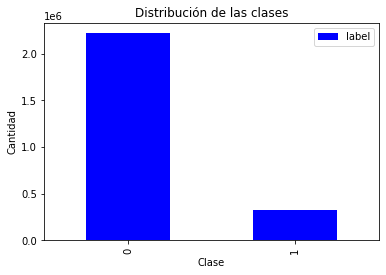

In [128]:
plt.figure()
plt.title("Distribución de las clases")
df_unsw['label'].value_counts().plot(kind="bar", color='b')
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.legend()
plt.show()

* Etiqeuta 'attack_cat'

In [129]:
df_unsw.attack_cat.value_counts()

normal            2218764
generic            215481
exploits            44525
fuzzers             24246
dos                 16353
reconnaissance      13987
analysis             2677
backdoor             2329
shellcode            1511
worms                 174
Name: attack_cat, dtype: int64

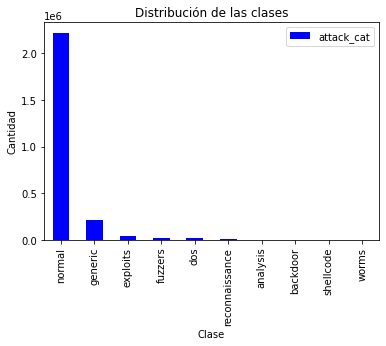

In [130]:
plt.figure()
plt.title("Distribución de las clases")
df_unsw['attack_cat'].value_counts().plot(kind="bar", color='b')
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.legend()
plt.show()

In [131]:
df_unsw.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload',
       'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'label'],
      dtype='object')

In [227]:
df_unsw[(df_unsw.dur == 0)].proto.value_counts()

arp     5107
ospf    2402
tcp      451
udp      212
icmp     177
unas      22
esp        1
Name: proto, dtype: int64

<h3> 4. Submuestra base de datos UNSW-NB15 </h3>

1. Tomando 199.357 muestras de tráfico normal

In [228]:
df_UNSW = df_unsw[(df_unsw.label == 0) & ((df_unsw.proto == 'udp') | (df_unsw.proto == 'tcp') | (df_unsw.proto == 'arp') | (df_unsw.proto == 'icmp')) & (df_unsw.dur != 0)].reset_index(drop = 'true')
df_UNSW = df_UNSW.sample(n = 199400).reset_index(drop = 'true')
df_UNSW

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,149.171.126.15,47439,175.45.176.3,53,udp,INT,0.000006,264,0,60,...,0,15,15,8,8,8,8,15,normal,0
1,59.166.0.3,23618,149.171.126.6,80,tcp,FIN,1.130097,1684,10168,31,...,0,4,2,3,4,2,1,1,normal,0
2,59.166.0.9,21924,149.171.126.3,80,tcp,FIN,1.495202,1580,10168,31,...,0,4,6,1,1,1,1,1,normal,0
3,59.166.0.4,54894,149.171.126.2,53,udp,CON,0.000997,130,162,31,...,0,2,1,1,5,1,1,1,normal,0
4,59.166.0.9,55755,149.171.126.9,80,tcp,FIN,1.109873,1684,10168,31,...,0,1,1,3,1,1,1,1,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199395,59.166.0.5,59617,149.171.126.0,27547,tcp,FIN,0.223467,424,8824,31,...,0,2,2,4,5,1,1,4,normal,0
199396,59.166.0.0,22370,149.171.126.1,21093,tcp,FIN,0.004724,4016,2456,31,...,0,6,12,5,7,1,1,3,normal,0
199397,59.166.0.3,23455,149.171.126.3,80,tcp,FIN,0.015011,1040,824,31,...,0,2,1,3,9,1,1,1,normal,0
199398,59.166.0.2,60368,149.171.126.5,64659,tcp,FIN,0.017999,2854,30470,31,...,0,5,1,1,2,1,1,1,normal,0


2 Tomando caracteríticas comunes en la submuestra de la base de datos UNSW-NB15 y agregando nuevas 

In [229]:
df_UNSW = df_UNSW[['stime','proto','srcip', 'sport', 'dstip', 'dsport','state','ltime','dur','spkts', 'dpkts','sbytes','dbytes','label']]

encoder = OrdinalEncoder(categories=[df_UNSW.proto.unique()],dtype=np.int64)
df_UNSW.insert(2,'proto_number',encoder.fit_transform(df_UNSW[['proto']]))

df_UNSW.insert(7,'pkts',df_UNSW.spkts + df_UNSW.dpkts)
df_UNSW.insert(8,'bytes',df_UNSW.sbytes + df_UNSW.dbytes)

encoder = OrdinalEncoder(categories=[df_UNSW.state.unique()],dtype=np.int64)
df_UNSW.insert(10,'state_number',encoder.fit_transform(df_UNSW[['state']]))

df_UNSW = df_UNSW.rename(columns={'srcip':'saddr','dstip':'daddr','dsport':'dport'})
df_UNSW.columns


Index(['stime', 'proto', 'proto_number', 'saddr', 'sport', 'daddr', 'dport',
       'pkts', 'bytes', 'state', 'state_number', 'ltime', 'dur', 'spkts',
       'dpkts', 'sbytes', 'dbytes', 'label'],
      dtype='object')

3. Calculando de la submuestra 12 características nuevas

In [199]:
def calcule_feature(df_features):
    dict = df_features[['saddr', 'bytes']].groupby("saddr").sum().T.to_dict('records')
    df_features['TnBPSrcIP'] = df_features['saddr'].map(dict[0], na_action = 'ignore')

    dict = df_features[['daddr', 'bytes']].groupby("daddr").sum().T.to_dict('records')
    df_features['TnBPDstIP'] = df_features['daddr'].map(dict[0], na_action = 'ignore')

    dict = df_features[['saddr', 'pkts']].groupby("saddr").sum().T.to_dict('records')
    df_features['TnP_PSrcIP'] = df_features['saddr'].map(dict[0], na_action = 'ignore')

    dict = df_features[['daddr', 'pkts']].groupby("daddr").sum().T.to_dict('records')
    df_features['TnP_PDstIP'] = df_features['daddr'].map(dict[0], na_action = 'ignore')

    dict = df_features[['proto', 'pkts']].groupby("proto").sum().T.to_dict('records')
    df_features['TnP_PerProto'] = df_features['proto'].map(dict[0], na_action = 'ignore')

    dict = df_features[['dport', 'pkts']].groupby("dport").sum().T.to_dict('records')
    df_features['TnP_Per_Dport'] = df_features['dport'].map(dict[0], na_action = 'ignore')

    dict = df_features[['saddr','proto','pkts','dur']].groupby(['saddr','proto']).sum().reset_index()
    dict['AR_P_Proto_P_SrcIP'] = dict.pkts / dict.dur
    dict['key'] = dict.apply(lambda row: row.saddr + row.proto, axis = 1)
    dict = dict[['key','AR_P_Proto_P_SrcIP']].set_index('key').T.to_dict('records')
    df_features['AR_P_Proto_P_SrcIP'] = df_features.apply(lambda row: row.saddr + row.proto, axis = 1).map(dict[0], na_action = 'ignore')

    dict = df_features[['daddr','proto','pkts','dur']].groupby(['daddr','proto']).sum().reset_index()
    dict['AR_P_Proto_P_DstIP'] = dict.pkts / dict.dur
    dict['key'] = dict.apply(lambda row: row.daddr + row.proto, axis = 1)
    dict = dict[['key','AR_P_Proto_P_DstIP']].set_index('key').T.to_dict('records')
    df_features['AR_P_Proto_P_DstIP'] = df_features.apply(lambda row: row.daddr + row.proto, axis = 1).map(dict[0], na_action = 'ignore')

    dict = df_features.daddr.value_counts().to_dict()
    df_features['N_IN_Conn_P_DstIP'] = df_features['daddr'].map(dict, na_action = 'ignore')

    dict = df_features.saddr.value_counts().to_dict()
    df_features['N_IN_Conn_P_SrcIP'] = df_features['saddr'].map(dict, na_action = 'ignore')

    dict = df_features[['sport','proto','pkts','dur']].groupby(['sport','proto']).sum().reset_index()
    dict['AR_P_Proto_P_Sport'] = dict.pkts / dict.dur
    dict['key'] = dict.apply(lambda row: str(row.sport) + row.proto, axis = 1)
    dict = dict[['key','AR_P_Proto_P_Sport']].set_index('key').T.to_dict('records')
    df_features['AR_P_Proto_P_Sport'] = df_features.apply(lambda row: str(row.sport) + row.proto, axis = 1).map(dict[0], na_action = 'ignore')

    dict = df_features[['dport','proto','pkts','dur']].groupby(['dport','proto']).sum().reset_index()
    dict['AR_P_Proto_P_Dport'] = dict.pkts / dict.dur
    dict['key'] = dict.apply(lambda row: str(row.dport) + row.proto, axis = 1)
    dict = dict[['key','AR_P_Proto_P_Dport']].set_index('key').T.to_dict('records')
    df_features['AR_P_Proto_P_Dport'] = df_features.apply(lambda row: str(row.dport) + row.proto, axis = 1).map(dict[0], na_action = 'ignore')

In [230]:
n = 199400
df_complete_UNSW = pd.DataFrame()

for i in range (0,int(n/100)):
    df_features = df_UNSW.loc[i*100:i*100+99].copy()
    calcule_feature(df_features)
    df_complete_UNSW = pd.concat([df_complete_UNSW,df_features])

4. Organizando columnas de la base de datos

In [231]:
df_complete_UNSW['attack'] = df_complete_UNSW.label
df_complete_UNSW = df_complete_UNSW.drop(['label'], axis = 1)

In [232]:
df_complete_UNSW = df_complete_UNSW.loc[0:199356]
df_complete_UNSW.shape

(199357, 30)

In [233]:
df_complete_UNSW.dtypes.value_counts()

int64      21
float64     5
object      4
dtype: int64

In [234]:
df_complete_UNSW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199357 entries, 0 to 199356
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   stime               199357 non-null  int64  
 1   proto               199357 non-null  object 
 2   proto_number        199357 non-null  int64  
 3   saddr               199357 non-null  object 
 4   sport               199357 non-null  int64  
 5   daddr               199357 non-null  object 
 6   dport               199357 non-null  int64  
 7   pkts                199357 non-null  int64  
 8   bytes               199357 non-null  int64  
 9   state               199357 non-null  object 
 10  state_number        199357 non-null  int64  
 11  ltime               199357 non-null  int64  
 12  dur                 199357 non-null  float64
 13  spkts               199357 non-null  int64  
 14  dpkts               199357 non-null  int64  
 15  sbytes              199357 non-nul

In [235]:
df_complete_UNSW

,stime,proto,proto_number,saddr,sport,daddr,dport,pkts,bytes,state,...,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,attack
0,1424245639,udp,0,149.171.126.15,47439,175.45.176.3,53,2,264,INT,...,22,196,106,3.043478e+05,297297.297297,11,7,327272.727273,4282.136220,0
1,1421938396,tcp,1,59.166.0.3,23618,149.171.126.6,80,32,11852,FIN,...,126,6986,2420,5.301379e+01,29.880769,9,11,28.316153,33.295351,0
2,1421933807,tcp,1,59.166.0.9,21924,149.171.126.3,80,30,11748,FIN,...,340,6986,2420,5.474370e+01,108.897550,9,12,20.064179,33.295351,0
3,1421930087,udp,0,59.166.0.4,54894,149.171.126.2,53,4,292,CON,...,322,196,106,4.012036e+03,42.745090,8,6,4012.036108,4282.136220,0
4,1421962439,tcp,1,59.166.0.9,55755,149.171.126.9,80,32,11852,FIN,...,722,6986,2420,5.474370e+01,245.071771,7,12,28.832128,33.295351,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199352,1424247908,udp,0,149.171.126.15,47439,175.45.176.3,53,2,264,INT,...,6,154,114,2.000000e+06,857142.857143,3,1,583333.333333,4776.269482,0
199353,1424227657,tcp,1,59.166.0.5,28298,149.171.126.8,65497,158,71930,FIN,...,538,6287,158,6.326434e+02,389.802411,11,12,696.271422,696.271422,0
199354,1421935977,tcp,1,59.166.0.1,31740,149.171.126.3,6881,1257,1080228,FIN,...,1707,6287,1579,2.792728e+02,283.293458,9,6,226.667943,275.159349,0
199355,1421964588,tcp,1,59.166.0.2,1228,149.171.126.5,32630,58,7616,FIN,...,510,6287,58,5.492275e+02,135.739299,8,5,98.295588,98.295588,0


In [237]:
df_complete_UNSW.to_csv('./UNSW_Submuestra.csv',index = False)

<h1> Unir bases de datos </h1>

In [2]:
data = pd.concat([df_BOT_IOT,df_complete_UNSW]).reset_index(drop = 'true')

NameError: name 'df_BOT_IOT' is not defined

1. Recalculando 'proto_number' y 'state_number'

In [250]:
encoder = OrdinalEncoder(categories=[data.proto.unique()],dtype=np.int64)
data.proto_number = encoder.fit_transform(data[['proto']])

encoder = OrdinalEncoder(categories=[data.state.unique()],dtype=np.int64)
data.state_number = encoder.fit_transform(data[['state']])

In [4]:
data.to_csv('./BOT_IOT_UNSW.csv',index = False)

NameError: name 'data' is not defined

In [252]:
data.shape

(400000, 30)

2. Clases equilibradas

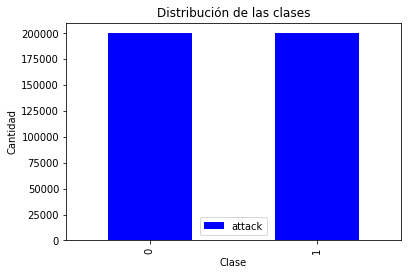

In [254]:
plt.figure()
plt.title("Distribución de las clases")
data['attack'].value_counts().plot(kind="bar", color='b')
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.legend()
plt.show()

In [5]:
datos_unidos = pd.read_csv('./BOT_IOT_UNSW.csv')

In [38]:
datos_unidos.dtypes

stime                 float64
proto                  object
proto_number            int64
saddr                  object
sport                   int64
daddr                  object
dport                   int64
pkts                    int64
bytes                   int64
state                  object
state_number            int64
ltime                 float64
dur                   float64
spkts                   int64
dpkts                   int64
sbytes                  int64
dbytes                  int64
TnBPSrcIP               int64
TnBPDstIP               int64
TnP_PSrcIP              int64
TnP_PDstIP              int64
TnP_PerProto            int64
TnP_Per_Dport           int64
AR_P_Proto_P_SrcIP    float64
AR_P_Proto_P_DstIP    float64
N_IN_Conn_P_DstIP       int64
N_IN_Conn_P_SrcIP       int64
AR_P_Proto_P_Sport    float64
AR_P_Proto_P_Dport    float64
attack                  int64
dtype: object

In [8]:
datos_unidos.proto.value_counts()

tcp          220210
udp          178558
arp             679
icmp            545
ipv6-icmp         8
Name: proto, dtype: int64

In [12]:
encoder = OrdinalEncoder(categories=[datos_unidos.proto.unique()],dtype=np.int64)
datos_unidos.proto_number = encoder.fit_transform(datos_unidos[['proto']])

In [22]:
encoder.categories_

[array(['arp', 'tcp', 'udp', 'ipv6-icmp', 'icmp'], dtype=object)]

In [32]:
encoder.inverse_transform([[0],[1],[2],[3],[4]])

array([['arp'],
       ['tcp'],
       ['udp'],
       ['ipv6-icmp'],
       ['icmp']], dtype=object)

In [33]:
encoder = OrdinalEncoder(categories=[datos_unidos.state.unique()],dtype=np.int64)
datos_unidos.state_number = encoder.fit_transform(datos_unidos[['state']])

In [34]:
encoder.categories_

[array(['CON', 'INT', 'FIN', 'NRS', 'RST', 'URP', 'REQ', 'ACC', 'TST',
        'ECO', 'MAS', 'CLO', 'TXD', 'ECR', 'URN', 'PAR'], dtype=object)]

In [37]:
encoder.inverse_transform([[11],[12],[13],[14],[15]])

array([['CLO'],
       ['TXD'],
       ['ECR'],
       ['URN'],
       ['PAR']], dtype=object)